# Exploratory Data Analysis (EDA)

### ***Import libraries***

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ***Load the dataset***

In [13]:
dataset = pd.read_csv('data\Heart_Disease_Data.csv', header=0)

### ***Check a sample of the dataset***

In [14]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## ***1. Create age groups to analyse the distribution of heart disease across different age ranges***

In [15]:
# find the lowest value in the 'age' column
lowest_age = dataset['Age'].min()

# find the largest value in the 'age' column
largest_age = dataset['Age'].max()

print("Lowest age:", lowest_age)
print("Largest age:", largest_age)

Lowest age: 29
Largest age: 77


In [16]:
# create a function to define the age group
def get_age_group(age):
    if 28 <= age <= 34:
        return '28-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 54:
        return '45-54'
    elif 55 <= age <= 64:
        return '55-64'
    elif 65 <= age <= 74:
        return '65-74'
    elif 75 <= age <= 80:
        return '75-80'
    else:
        return 'Other'

# create 'Age Group' column and apply yhr function to it
dataset['Age Group'] = dataset['Age'].apply(get_age_group)

# display a sample of the dataset with the new 'Age Group' column alongside the 'Age' column
print(dataset[['Age', 'Age Group']].head())

   Age Age Group
0   70     65-74
1   67     65-74
2   57     55-64
3   64     55-64
4   74     65-74


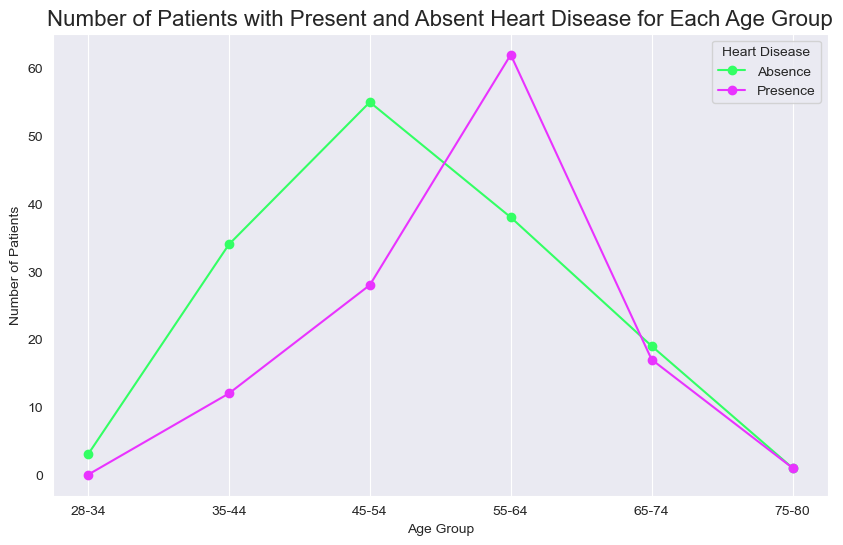

In [17]:
# count the number of patients with present and absent heart disease for each age group
heart_disease_count = dataset.groupby(['Age Group', 'Heart Disease']).size().unstack(fill_value=0)

# plot as line graph
heart_disease_count.plot(kind='line', marker='o', figsize=(10, 6), color=['#33FF64', '#E933FF'])

# graph details
plt.title('Number of Patients with Present and Absent Heart Disease for Each Age Group', fontsize=16)
plt.legend(labels=['Absence', 'Presence'], title='Heart Disease', loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.show()

### **The age data was organised into groups labelled as 'Age Groups'. With this category and the heart disease data, a line chart was generated to visualise the distribution of heart disease across various age brackets. It was observed that the age group 45-54 exhibited the highest number of patients without heart disease, while the age group 55-64 showed the highest number of patients with heart disease.**

## ***2. Analyse the relationship between different types of chest pain and the presence of heart disease*** 

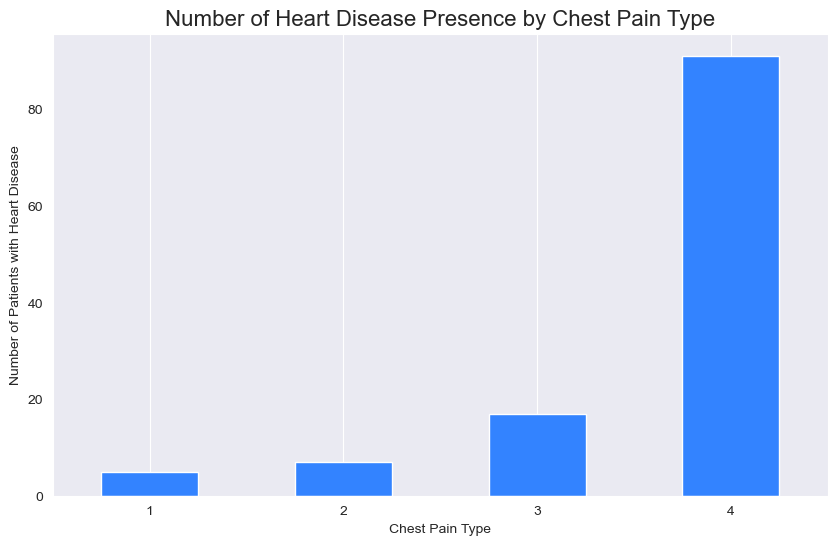

In [18]:
# only include the rows where heart disease is present
heart_disease_data = dataset[dataset['Heart Disease'] == 'Presence']

# group data by 'Chest pain type', calculate the amount of heart disease presence
heart_disease_count = heart_disease_data.groupby('Chest pain type').size() 

# plot as bar graph
heart_disease_count.plot(kind='bar', stacked=True, figsize=(10, 6), color='#3383FF')

# graph details
plt.title('Number of Heart Disease Presence by Chest Pain Type', fontsize=16)
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients with Heart Disease')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### **A bar chart was constructed to show the relationship of heart disease among patients based on the types of chest pain they reported. The data revealed that a considerable majority of patients diagnosed with heart disease reported having chest pain type 4, with a total of 91 individuals. In contrast, the combined total of heart disease patients who reported chest pain types 1, 2, and 3 came to 29.**

## ***3. Investigate how cholesterol levels vary with age***

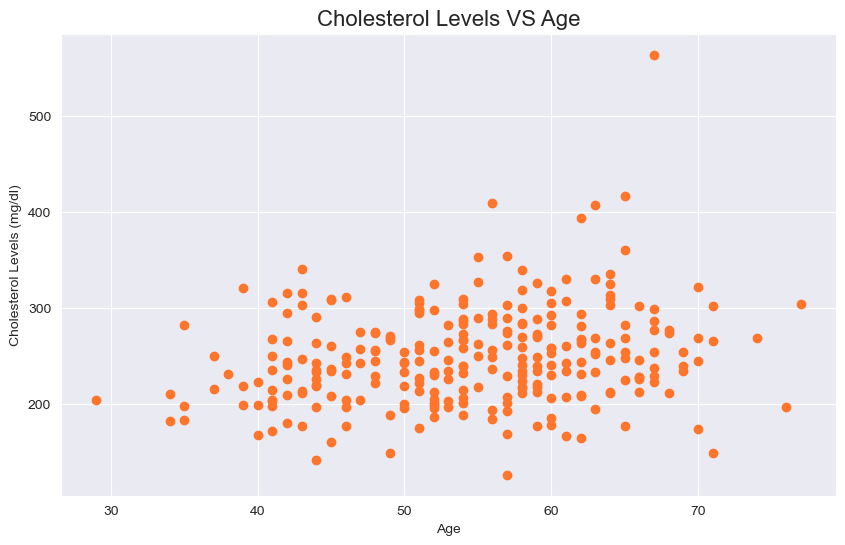

In [19]:
# plot cholesterol levels and age as scatter graph
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Age'], dataset['Cholesterol'], color='#FF752B')

# graph details
plt.title('Cholesterol Levels VS Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels (mg/dl)')
plt.show()

### **To explore the relationship between age and cholesterol levels, a scatter plot was produced using the available data. The graph suggests a gradual rise in cholesterol levels with age, though there is a range of different cholesterol levels for each age. Notably, there appears to be a potential outlier between the ages of 65 and 80, indicating a significantly different cholesterol level from the overall trend.**

## ***4. Use visualisation method to identify outliers in numerical features***

In [20]:
# show all numerical columns
numerical_features = dataset.select_dtypes(include=[np.number])
numerical_features.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

C:\Users\diani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

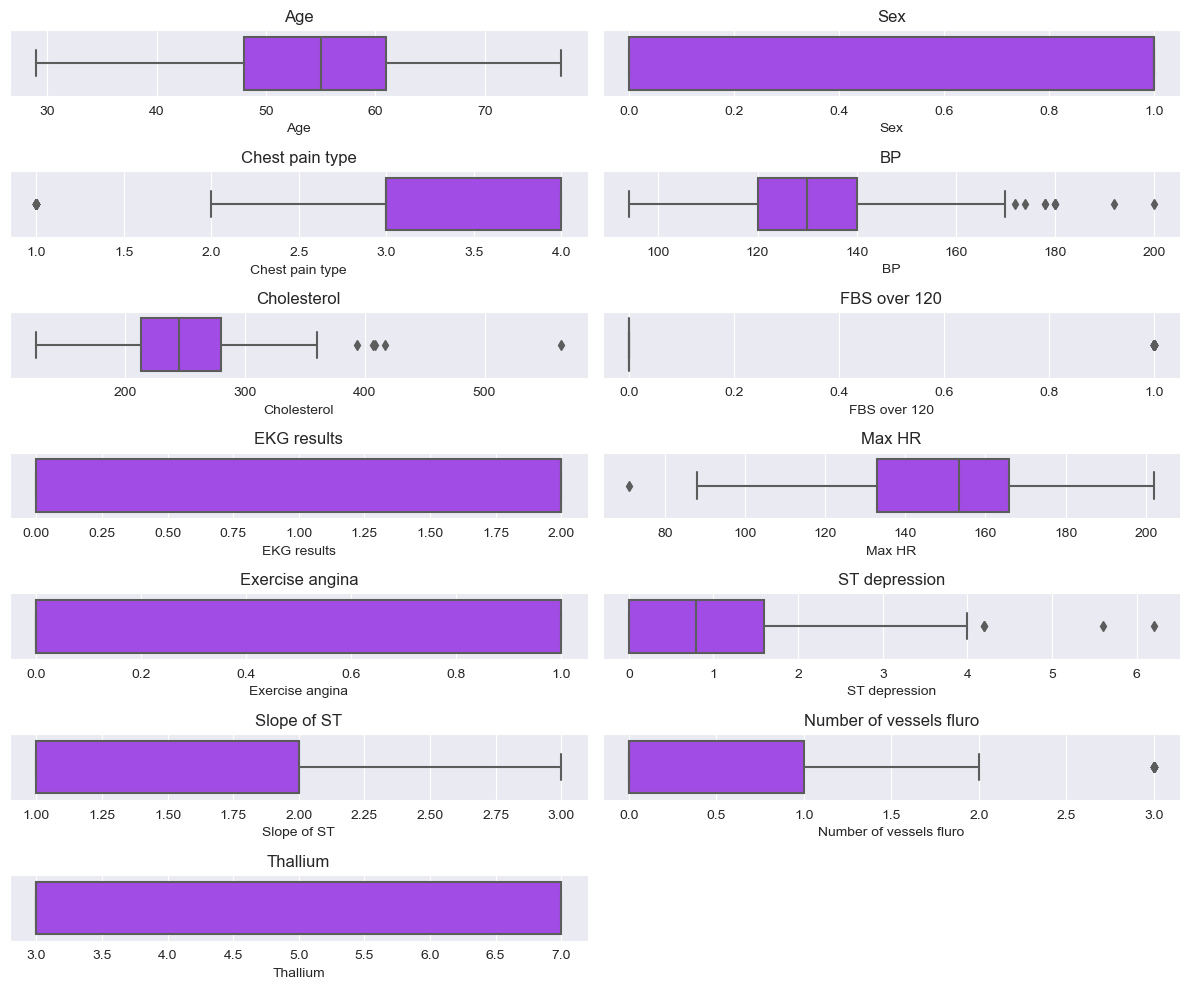

In [21]:
# plot as box plots 
plt.figure(figsize=(12, 10))
for columns in numerical_features.columns:
    plt.subplot(7, 2, numerical_features.columns.get_loc(columns) + 1)
    sns.boxplot(x=dataset[columns], color='#A232FF')
    plt.title(columns)
plt.tight_layout()
plt.show()

### **Boxplots were generated for each numerical feature to identify outliers. Variables such as Sex, EKG results, Exercise angina, and Thallium displayed cohesive distributions without outliers. The Slope of ST had an upper bound but no outliers, while Age had both upper and lower bounds, also without outliers. However, Chest pain type, FBS over 120, Max HR, and Number of vessels fluro each exhibited a single outlier. Additionally, ST depression showed two outliers, while Cholesterol presented four. Notably, BP had the highest number of outliers, totalling six.**

## ***5. Use visualisation method to illustrate patients having BP according to gender***

C:\Users\diani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

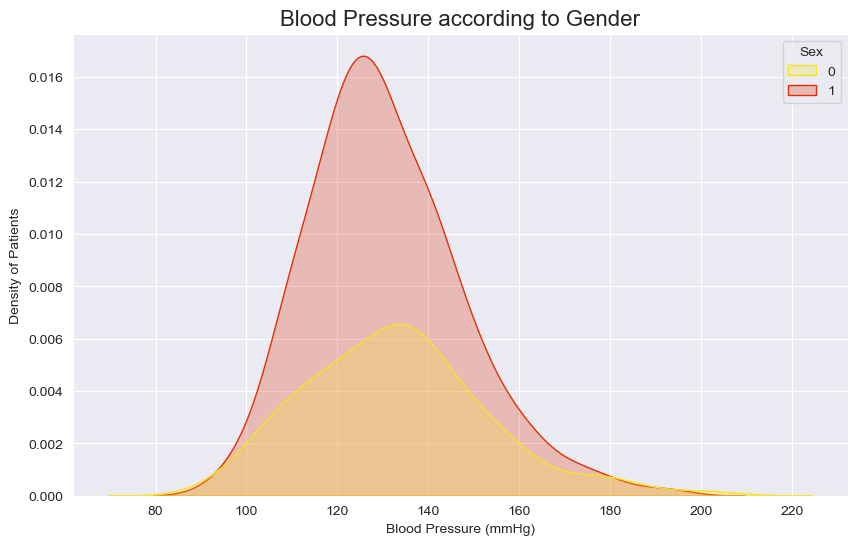

In [22]:
# plot as a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset, x='BP', hue='Sex', fill=True, palette=['#F7E323', '#E32E05'])
plt.title('Blood Pressure according to Gender', fontsize=16)
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Density of Patients')
plt.show()

### **A density plot was used to illustrate the distribution of patients' blood pressure by gender, revealing clear differences between the genders. Sex 1 patients display a higher density overall, with a distinct peak between 120-130mmHg. In contrast, sex 0 patients show a more gradual increase in density from around 90mmHg, reaching a peak between 130-140mmHg before gradually decreasing. The plot highlights the gender-specific patterns in blood pressure distribution which help to make comparisons between the two genders.**